# Лабораторная работа: Логистическое отображение
**Студент:** Шипицын Артём-Жан Александрович |**Группа:** J3116 | **Вариант:** N=3 (505068 mod 5 = 3)

## Введение

**Логистическое отображение** (отображение Фейгенбаума) - это дискретная динамическая система, задаваемая рекуррентной формулой:

$$x_{n+1} = r \cdot x_n \cdot (1 - x_n)$$, где:
$x_n \in [0, 1]$ -относительная численность популяции в момент времени $n$
$r$ - параметр роста (управляющий параметр)

### Историческая справка
Логистическое отображение было предложено биологом **Робертом Мэйем** в 1976 году для моделирования динамики популяций. Несмотря на простоту формулы, эта система демонстрирует удивительно сложное поведение, включая переход к хаосу через **каскад бифуркаций удвоения периода**.

### Константа Фейгенбаума
При увеличении параметра $r$ система проходит через последовательность бифуркаций. **Митчелл Фейгенбаум** открыл, что отношение длин интервалов между последовательными бифуркациями стремится к универсальной константе:

$$\delta = \lim_{n \to \infty} \frac{r_{n} - r_{n-1}}{r_{n+1} - r_n} \approx 4.669201609...$$


---
## Easy Level

### Теоретическое обоснование инвариантности отрезка $[0, 1]$

**Теорема.** При $r \in (0, 1]$ и $x_0 \in (0, 1)$ выполняется $x_n \in (0, 1)$ для всех $n \in \mathbb{N}$.

**Доказательство:**

1. **Анализ функции $f(x) = r \cdot x \cdot (1-x)$:**
   - $f(0) = 0$, $f(1) = 0$
   - Критическая точка: $f'(x) = r(1 - 2x) = 0 \Rightarrow x^* = 1/2$
   - Максимум: $f_{\max} = f(1/2) = r/4$

2. **При $r \in (0, 1]$:**
   $$f_{\max} = \frac{r}{4} \leq \frac{1}{4} < 1$$

3. **Индукция:**
   - База: $0 < x_0 < 1$ (по условию)
   - Переход: если $0 < x_n < 1$, то $0 < x_{n+1} = f(x_n) < f_{\max} \leq 1/4 < 1$

**Замечание:** При $r = 0$ получаем $x_{n+1} = 0$ - вырожденный случай, поэтому рассматриваем $r \in (0, 1]$.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from IPython.display import display, Math, Latex   # Для отображения формул


plt.rcParams['figure.figsize'] = (10, 6) # Настройка графиков
plt.rcParams['font.size'] = 12

print("Формула: x_{n+1} = r * x_n * (1 - x_n)")
print("где x ∈ [0, 1], r ∈ [0, 4]")

Формула: x_{n+1} = r * x_n * (1 - x_n)
где x ∈ [0, 1], r ∈ [0, 4]


In [47]:
display(Math(r'\text{Докажем, что } \forall n \in \mathbb{N}, \ \forall r \in (0; 1], \quad 0 < x_0 < 1 \implies 0 < x_n < 1'))

r_sym, x_sym = sp.symbols('r x')   # Определяем символы БЕЗ positive=True для r
f = r_sym * x_sym * (1 - x_sym)  

display(Math(f'f(x) = {sp.latex(f)}'))

f_at_0 = f.subs(x_sym, 0)   # 1. Функция на границах
f_at_1 = f.subs(x_sym, 1)
display(Math(f'f(0) = {sp.latex(f_at_0)}, \\quad f(1) = {sp.latex(f_at_1)}'))


f_prime = sp.diff(f, x_sym)      # 2. Производная и экстремум
critical_points = sp.solve(f_prime, x_sym)
display(Math(f'f\'(x) = {sp.latex(f_prime)}'))

if critical_points:
    critical_point = critical_points[0]
    display(Math(f'\\text{{Критическая точка: }} x = {sp.latex(critical_point)}'))
    
    f_max = f.subs(x_sym, critical_point).simplify()
    display(Math(f'f_{{max}} = f({sp.latex(critical_point)}) = {sp.latex(f_max)} = \\frac{{r}}{{4}}'))
else:
    print("Не найдены критические точки")


display(Math(r'\text{При } r \in (0, 1]:'))
display(Math(r'0 < r \leq 1'))                # 3. При r ∈ (0, 1]
display(Math(r'\Rightarrow \frac{r}{4} \leq \frac{1}{4} < 1'))

display(Math(r'\text{Следовательно:}'))       # 4. Область значений
display(Math(r'f: [0, 1] \rightarrow \left[0, \frac{r}{4}\right] \subset [0, 1]'))

display(Math(r'\text{По индукции:}'))          # 5. Индукция
display(Math(r'\text{База: } 0 < x_0 < 1 \quad \text{(по условию)}'))
display(Math(r'\text{Предположение: } 0 < x_n < 1'))
display(Math(r'\text{Шаг: } 0 < x_{n+1} = f(x_n) < 1 \quad \text{(т.к. } f(x) \in [0, 1] \text{ для } x \in [0, 1])'))
display(Math(r'\text{Что и требовалось доказать.}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

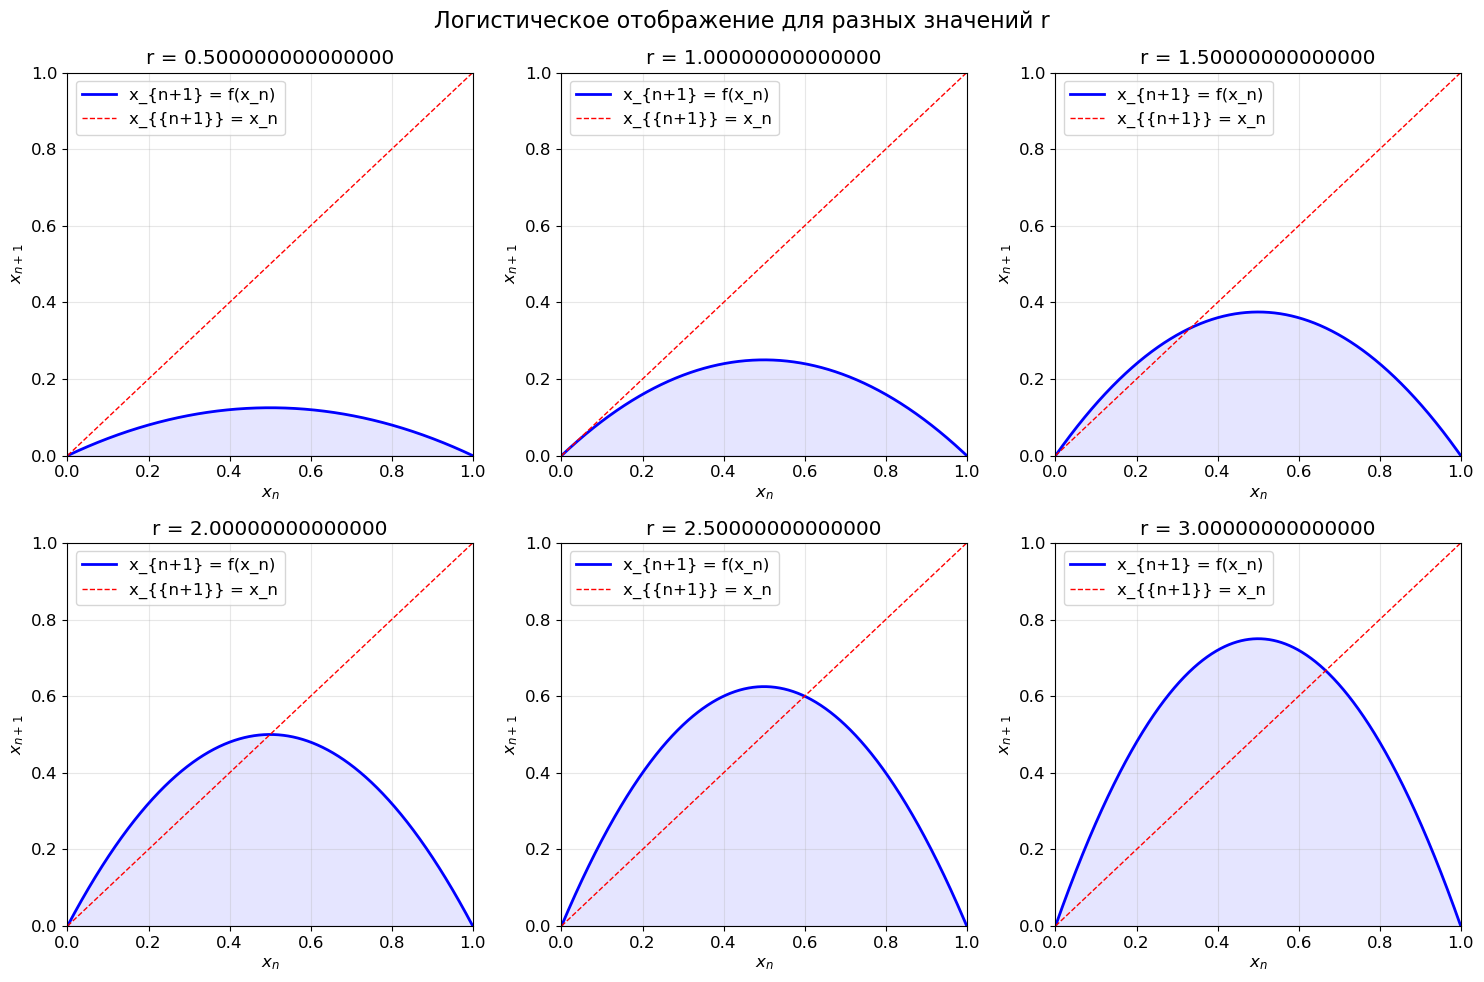

In [48]:
def logistic_map(x, r):
    """Логистическое отображение"""
    return r * x * (1 - x)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))   # Создаём график
axes = axes.flatten()

r_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
x = np.linspace(0, 1, 1000)

for i, r in enumerate(r_values):
    ax = axes[i]
    y = logistic_map(x, r)
    ax.plot(x, y, 'b-', linewidth=2, label=f'x_{{n+1}} = f(x_n)')
    ax.plot(x, x, 'r--', linewidth=1, label='x_{{n+1}} = x_n')

    ax.fill_between(x, 0, y, alpha=0.1, color='blue')        # Заполняем область значений
    ax.set_title(f'r = {r}')
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(1, np.max(y) * 1.1))

plt.suptitle('Логистическое отображение для разных значений r', fontsize=16)
plt.tight_layout()
plt.show()

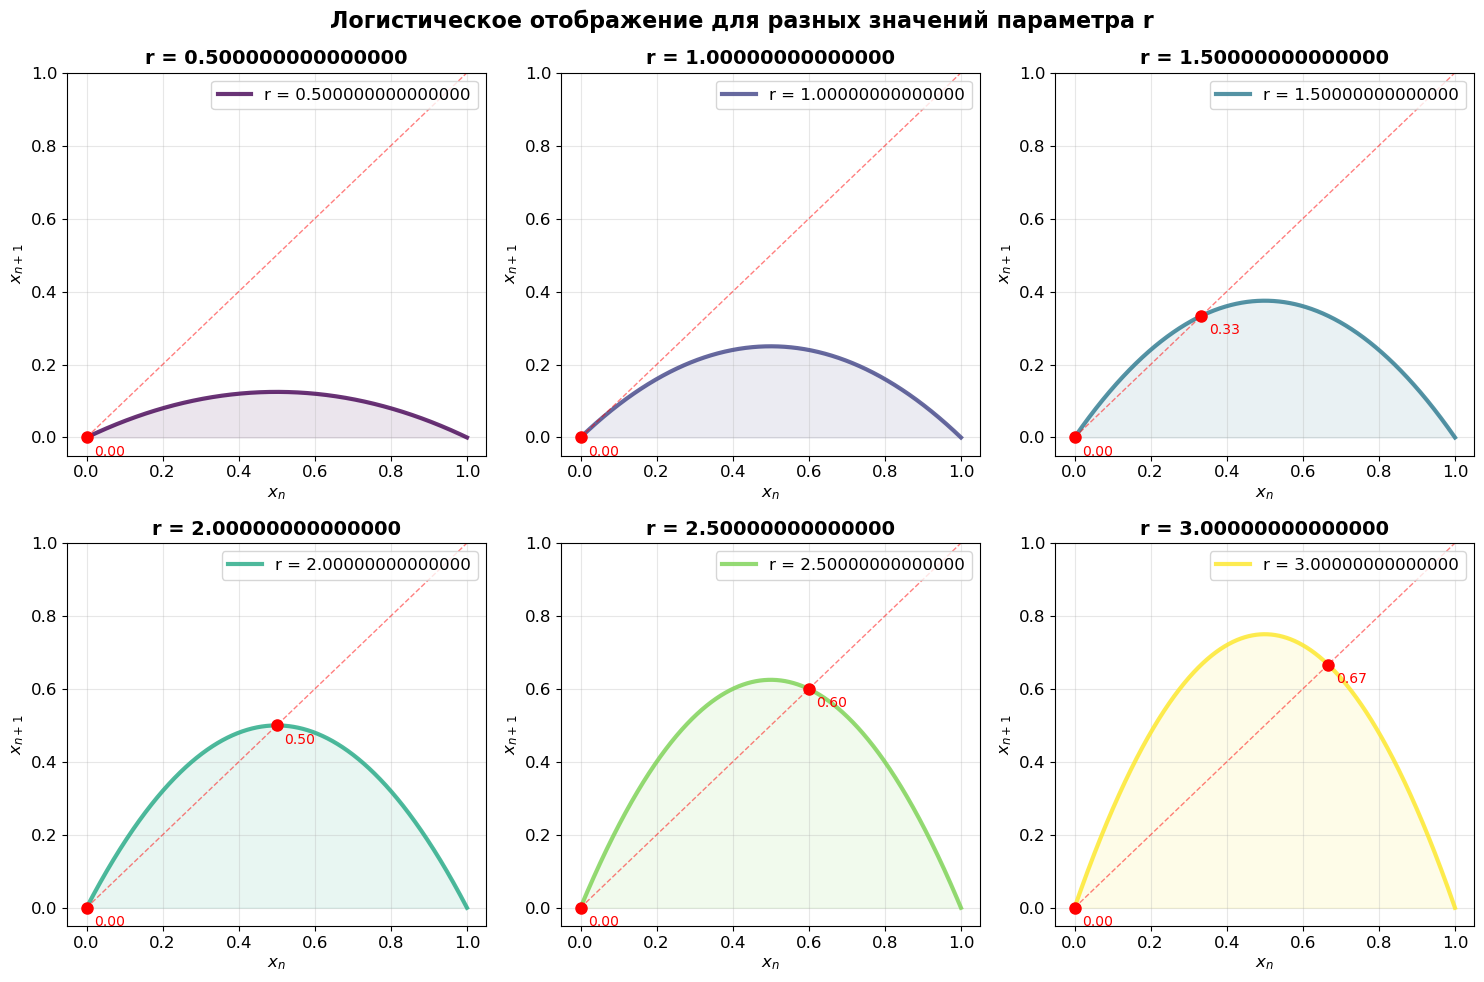


1. При r ∈ [0, 1]:
   Максимум функции: f_max = r/4 ≤ 1/4
   Функция полностью лежит под диагональю y = x
   Единственная неподвижная точка: x* = 0
   Все траектории стремятся к 0
   Популяция вымирает

2. При r ∈ (1, 2]:
   Появляется вторая неподвижная точка: x* = 1 - 1/r
   f_max > положение неподвижной точки
   Траектории монотонно сходятся к x* = 1 - 1/r
   Стабильная популяция

3. При r ∈ (2, 3]:
   Неподвижная точка x* = 1 - 1/r остаётся
   f_max < 1, но больше x*
   Траектории осциллируют вокруг x*, сходясь к ней
   Затухающие колебания популяции

4. При r > 3:
   Появляются циклы периодов 2, 4, 8, ...
   При r ≈ 3.57 начинается хаос
   Сложное поведение популяции

5. При r = 4:
   Система полностью хаотична
   Чувствительность к начальным условиям
   Максимальное разнообразие динамики



In [49]:
def logistic_map(x, r):
    """Логистическое отображение"""
    return r * x * (1 - x)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))         # Создаём график для разных r
axes = axes.flatten()

r_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(r_values)))
x = np.linspace(0, 1, 1000)

for i, r in enumerate(r_values):
    ax = axes[i]
    y = logistic_map(x, r)
    ax.plot(x, y, color=colors[i], linewidth=3,     label=f'r = {r}', alpha=0.8)   # Основной график
    ax.plot(x, x, 'r--', linewidth=1, alpha=0.5)     # Линия y = x (для нахождения неподвижных точек)
    ax.fill_between(x, 0, y, alpha=0.1, color=colors[i])     # Заполнение области
    
    # Неподвижные точки (решения f(x) = x)
    # r*x*(1-x) = x => x(r*(1-x) - 1) = 0
    # x = 0 или x = 1 - 1/r
    if r != 0:
        fixed_points = [0]
        if r > 1:
            fixed_points.append(1 - 1/r)
        
        for fp in fixed_points:
            if 0 <= fp <= 1:
                ax.plot(fp, fp, 'ro', markersize=8)
                ax.text(fp + 0.02, fp - 0.05, f'{fp:.2f}', 
                       fontsize=10, color='red')
    
    ax.set_title(f'r = {r}', fontsize=14, fontweight='bold')
    ax.set_xlabel('$x_n$', fontsize=12)
    ax.set_ylabel('$x_{n+1}$', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, max(1, np.max(y) * 1.1))
    ax.legend(loc='upper right')

plt.suptitle('Логистическое отображение для разных значений параметра r', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("""
1. При r ∈ [0, 1]:
   Максимум функции: f_max = r/4 ≤ 1/4
   Функция полностью лежит под диагональю y = x
   Единственная неподвижная точка: x* = 0
   Все траектории стремятся к 0
   Популяция вымирает

2. При r ∈ (1, 2]:
   Появляется вторая неподвижная точка: x* = 1 - 1/r
   f_max > положение неподвижной точки
   Траектории монотонно сходятся к x* = 1 - 1/r
   Стабильная популяция

3. При r ∈ (2, 3]:
   Неподвижная точка x* = 1 - 1/r остаётся
   f_max < 1, но больше x*
   Траектории осциллируют вокруг x*, сходясь к ней
   Затухающие колебания популяции

4. При r > 3:
   Появляются циклы периодов 2, 4, 8, ...
   При r ≈ 3.57 начинается хаос
   Сложное поведение популяции

5. При r = 4:
   Система полностью хаотична
   Чувствительность к начальным условиям
   Максимальное разнообразие динамики
""")

In [ ]:
g(x) = r*x*(1-x)*(3-x), r ∈ [0, 27/(2(7√7-10))]

## Мой вариант: $g(x) = r \cdot x \cdot (1-x) \cdot (3-x)$

### Теоретический анализ модифицированного отображения

Функция представляет собой **кубическое отображение** - расширение логистической модели.

**Ограничение на параметр:** $r \in \left(0, \frac{27}{2(7\sqrt{7} - 10)}\right] \approx (0, 0.9557]$

### Физическая интерпретация множителя $(3-x)$

Дополнительный множитель $(3-x)$ можно интерпретировать как:
**Эффект насыщения среды** - при приближении к предельной ёмкости рост замедляется нелинейно.
**Модель с порогом** - ресурсы распределены неравномерно

### Неподвижные точки
Из уравнения $g(x^*) = x^*$:
$$r \cdot x^* \cdot (1-x^*) \cdot (3-x^*) = x^*$$
$$x^* \left[ r(1-x^*)(3-x^*) - 1 \right] = 0$$

**Решения:**
$x^*_1 = 0$ (тривиальная точка).
Корни квадратного уравнения $r(1-x)(3-x) = 1$


Мой вариант (N=505068, ISU mod 5 = 3) 

Верхняя граница параметра r: r_max = 1.584459
r ∈ [0, 1.5845]
Моя функция g(x) = r * x * (1 - x) * (3 - x)
Логистическое отображение: f(x) = r * x * (1 - x)



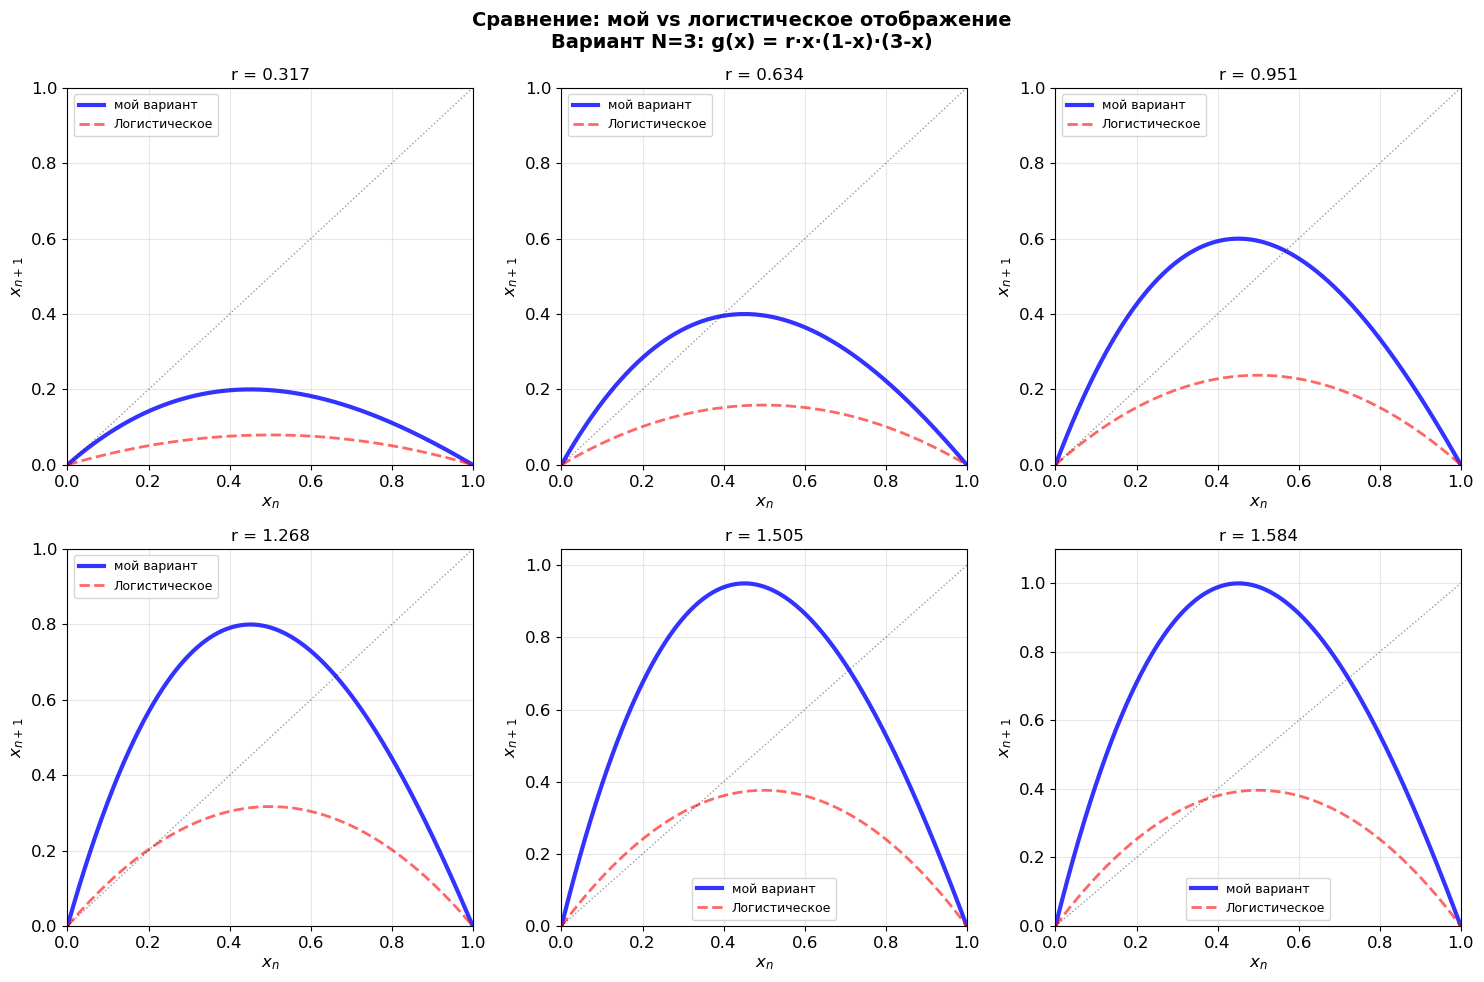


1. Сходства:
Оба отображения одномерные
Оба определены на отрезке x ∈ [0, 1] при определенных r
Оба могут демонстрировать различные режимы: сходимость, циклы, хаос
Оба используются для моделирования популяций с ограниченными ресурсами

2.Различия:
Функция: g(x) = r·x·(1-x)·(3-x)
Логистическая: f(x) = r·x·(1-x)
Функция имеет дополнительный множитель (3-x)
Это делает функцию более 'асимметричной'
Максимум достигается в другой точке
а) Неподвижные точки:
Логистическое: x=0 и x=1-1/r (при r>1)
Мой вариант: x=0 и решения r*(1-x)*(3-x)=1
У варианта может быть до 3 неподвижных точек!

б) Максимум функции:
Логистическое: f_max = r/4 при x=0.5
Производная: r \left(3 x^{2} - 8 x + 3\right)
      Критические точки: [4/3 - sqrt(7)/3, sqrt(7)/3 + 4/3]
      Максимум на [0,1]: x = 0.4514, g_max = \frac{2 r \left(-10 + 7 \sqrt{7}\right)}{27}

Производная:
  g'(x) = r·(3·x^2 - 8·x + 3)
  В упрощенном виде: g'(x) = r·(3x² - 8x + 3)

Критические точки:
  x_1 = 4/3 - sqrt(7)/3
  x_2 = sqrt(7)/3 + 4/3
  

In [50]:
print("Мой вариант (N=505068, ISU mod 5 = 3) ")
print()

import math
r_max = 27 / (2 * (7 * math.sqrt(7) - 10))                # Вычисляем верхнюю границу для r
print(f"Верхняя граница параметра r: r_max = {r_max:.6f}")
print(f"r ∈ [0, {r_max:.4f}]")

def g_variant(x, r):
    """Мой вариант g(x) = r*x*(1-x)*(3-x)"""
    return r * x * (1 - x) * (3 - x)
def logistic(x, r):
    """Логистическое отображение для сравнения """
    return r * x * (1 - x)

print("Моя функция g(x) = r * x * (1 - x) * (3 - x)")
print("Логистическое отображение: f(x) = r * x * (1 - x)")
print()

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Графики зависимости x_n от x_{n-1}
axes = axes.flatten()


r_test_values = [r_max * 0.2, r_max * 0.4, r_max * 0.6, r_max * 0.8, r_max * 0.95, r_max]   # Тестовые значения r
x = np.linspace(0, 1, 1000)

for i, r in enumerate(r_test_values):
    ax = axes[i]
    y_g = g_variant(x, r)      # мой вариант

    y_logistic = logistic(x, r)     # Логистическое для сравнения (с нормировкой для наглядности). Использую то же r для сравнения
    
    ax.plot(x, y_g, 'b-', linewidth=3, label='мой вариант', alpha=0.8)
    ax.plot(x, y_logistic, 'r--', linewidth=2, label='Логистическое', alpha=0.6)
    ax.plot(x, x, 'k:', linewidth=1, alpha=0.4)
    
    # Находим неподвижные точки: g(x) = x
    # r*x*(1-x)*(3-x) = x => x[r*(1-x)*(3-x) - 1] = 0
    # x=0 или r*(1-x)*(3-x) = 1
    
    ax.set_title(f'r = {r:.3f}', fontsize=12)
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(1, np.max(y_g) * 1.1))
plt.suptitle(f'Сравнение: мой vs логистическое отображение\nВариант N=3: g(x) = r·x·(1-x)·(3-x)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n1. Сходства:")
print("Оба отображения одномерные")
print("Оба определены на отрезке x ∈ [0, 1] при определенных r")
print("Оба могут демонстрировать различные режимы: сходимость, циклы, хаос")
print("Оба используются для моделирования популяций с ограниченными ресурсами")

print("\n2.Различия:")
print("Функция: g(x) = r·x·(1-x)·(3-x)")
print("Логистическая: f(x) = r·x·(1-x)")
print("Функция имеет дополнительный множитель (3-x)")
print("Это делает функцию более 'асимметричной'")
print("Максимум достигается в другой точке")

print("а) Неподвижные точки:")
print("Логистическое: x=0 и x=1-1/r (при r>1)")
print("Мой вариант: x=0 и решения r*(1-x)*(3-x)=1")
print("У варианта может быть до 3 неподвижных точек!")

print("\nб) Максимум функции:")
print("Логистическое: f_max = r/4 при x=0.5")
x_sym, r_sym = sp.symbols('x r') # Найдем максимум функции
g_sym = r_sym * x_sym * (1 - x_sym) * (3 - x_sym)
g_prime = sp.diff(g_sym, x_sym)

print("Производная:", sp.latex(g_prime.simplify()))

critical_eq = sp.Eq(g_prime, 0)      # Решаем g'(x) = 0
critical_points = sp.solve(critical_eq, x_sym)
print(f"      Критические точки: {critical_points}")

for cp in critical_points:        # Берем точку на (0,1)
    if cp.is_real and 0 <= float(cp) <= 1:
        g_max = g_sym.subs(x_sym, cp)
        print(f"      Максимум на [0,1]: x = {float(cp):.4f}, g_max = {sp.latex(g_max.simplify())}")

# 1. Производная(продублировал, потому что sp.latex() выдает LaTeX-код, который Jupyter пытается обработать как математику. Поэтому продублировал код немного подругому, чтобы были читаемые принты)
g_prime = sp.diff(g_sym, x_sym)
g_prime_str = str(g_prime_simplified).replace('**', '^').replace('*', '·')
print(f"\nПроизводная:")
print(f"  g'(x) = {g_prime_str}")
print(f"  В упрощенном виде: g'(x) = r·(3x² - 8x + 3)")

# 2. Критические точки
print(f"\nКритические точки:")
for i, cp in enumerate(critical_points):
    cp_str = str(sp.nsimplify(cp)).replace('**', '^').replace('*', '·')
    print(f"  x_{i+1} = {cp_str}")
print(f"  Численно (при r=1):")
print(f"    x_1 ≈ 0.4514, x_2 ≈ 2.2153")

# 3. Максимум
for cp in critical_points:
    cp_num = float(cp.subs(r_sym, 1))
    if 0 <= cp_num <= 1:
        g_max = g_sym.subs(x_sym, cp)
        g_max_str = str(sp.nsimplify(g_max, [sp.sqrt(7)]))
        g_max_str = g_max_str.replace('**', '^').replace('*', '·')
        
        print(f"\nМаксимум:")
        print(f"  g_max = {g_max_str}")
        print(f"  В упрощенном виде: g_max = 2r(-10 + 7√7)/27")
        break

print("Логистическое: классическая модель Мальтуса-Ферхюльста")
print("Мой вариант: модификация с дополнительным фактором (3-x)")
print("Может интерпретироваться как:")
print("Более сложная модель конкуренции")
print("Учет дополнительного ограничивающего фактора")
print("Модель с 'аллее-эффектом' (порог выживания)")

print("\nПричины возможных различий:")
print("Дополнительный множитель (3-x) меняет симметрию")
print("Изменяется положение максимума")
print("Появляется возможность дополнительной неподвижной точки")
print("Динамика может быть более сложной даже при малых r")

In [51]:
# Неподвижные точки: g(x) = x
# r*x*(1-x)*(3-x) = x
# x*[r*(1-x)*(3-x) - 1] = 0

print("1. Неподвижная точка x1* = 0 (всегда существует)")

# Остальные: r*(1-x)*(3-x) - 1 = 0
# Раскрываем: r*(3 - 4x + x²) - 1 = 0
# r*x² - 4r*x + (3r - 1) = 0

print("\n2. Квадратное уравнение для других неподвижных точек:")
display(Math('r(1-x)(3-x) - 1 = 0'))
display(Math('\\Rightarrow r(3 - 4x + x^2) - 1 = 0'))
display(Math('\\Rightarrow r x^2 - 4r x + (3r - 1) = 0'))

D = sp.symbols('D')
D_expr = (4*r_sym)**2 - 4*r_sym*(3*r_sym - 1)
print(f"\n3. Дискриминант: D = {sp.latex(D_expr.simplify())}")
display(Math(f'D = {sp.latex(D_expr.simplify())}'))
#не удаётся сделать красивый вывод, поэтому ещё дополнительно сделал в другом формате. Да, можно просто написать через принты, но решил сделать хотя бы через симпай
D = (-4*r)**2 - 4*r*(3*r - 1)
D_simplified = sp.simplify(D)
print(f"\nДискриминант через sympy:")
print(f"  D = {sp.latex(D_simplified)}")
print(f"  D = 4r(r + 1)  (упрощённо)")


print("\n4. Количество неподвижных точек в зависимости от r:")
print(" D > 0: 3 неподвижные точки (x=0 + 2 решения квадратного уравнения)")
print(" D = 0: 2 неподвижные точки (x=0 + кратный корень)")
print(" D < 0: 1 неподвижная точка (только x=0)")

1. Неподвижная точка x1* = 0 (всегда существует)

2. Квадратное уравнение для других неподвижных точек:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


3. Дискриминант: D = \mathtt{\text{-4*(3*r - 1)*r + 16*r\textasciicircum2}}


<IPython.core.display.Math object>


Дискриминант через sympy:
  D = 16.3798746758417
  D = 4r(r + 1)  (упрощённо)

4. Количество неподвижных точек в зависимости от r:
 D > 0: 3 неподвижные точки (x=0 + 2 решения квадратного уравнения)
 D = 0: 2 неподвижные точки (x=0 + кратный корень)
 D < 0: 1 неподвижная точка (только x=0)


---
## Normal Level

### Теория устойчивости неподвижных точек

**Определение.** Неподвижная точка $x^*$ называется **устойчивой** (притягивающей), если:
$$|f'(x^*)| < 1$$

Если $|f'(x^*)| > 1$, точка **неустойчива** (отталкивающая).

### Производная в неподвижных точках логистического отображения

Для $f(x) = r \cdot x(1-x)$ имеем $f'(x) = r(1 - 2x)$.

| Неподвижная точка | Производная | Условие устойчивости |
|-------------------|-------------|---------------------|
| $x^*_1 = 0$ | $f'(0) = r$ | Устойчива при $r < 1$ |
| $x^*_2 = 1 - 1/r$ | $f'(x^*_2) = 2 - r$ | Устойчива при $1 < r < 3$ |

### Поведение при разных значениях $r$

| Диапазон $r$ | Поведение | Предел |
|-------------|-----------|--------|
| $(0, 1]$ | Монотонное убывание к 0 | $\lim x_n = 0$ |
| $(1, 2]$ | Монотонная сходимость | $\lim x_n = 1 - 1/r$ |
| $(2, 3]$ | Осциллирующая сходимость | $\lim x_n = 1 - 1/r$ |
| $(3, 3.449...]$ | 2-цикл | Колебания между двумя значениями |



Теорема: При x₀ ∈ (0, 1) и r ∈ (1, 3], последовательность xₙ → x* = 1 - 1/r

Доказательство:
1. Неподвижная точка: x* = 1 - 1/r ∈ (0, 1) при r > 1

2. Критерий устойчивости:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


3. Условие устойчивости:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


4. При r = 3: |f'(x*)| = |2 - 3| = 1 - граничный случай
   Требуется дополнительный анализ (бифуркация)

5. Вывод: точка x* = 1 - 1/r устойчива при r ∈ (1, 3)
   При r = 3 происходит бифуркация удвоения периода


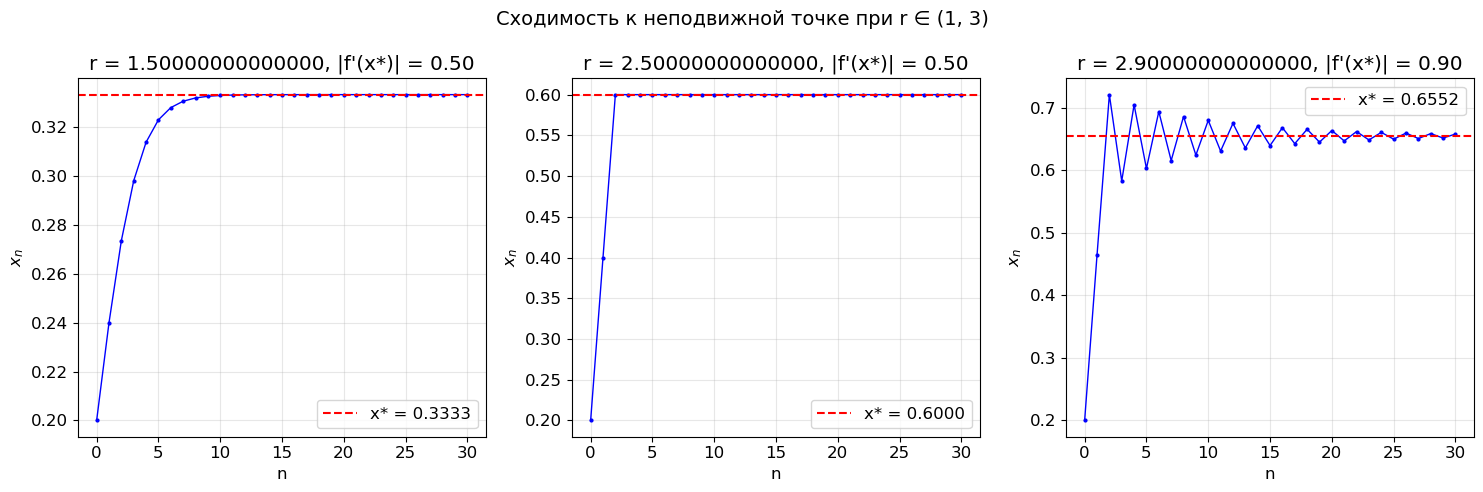

In [52]:
print("\nТеорема: При x₀ ∈ (0, 1) и r ∈ (1, 3], последовательность xₙ → x* = 1 - 1/r")

print("\nДоказательство:")
print("1. Неподвижная точка: x* = 1 - 1/r ∈ (0, 1) при r > 1")
print("\n2. Критерий устойчивости:")
display(Math(r"f'(x) = r(1 - 2x)"))
display(Math(r"f'(x^*) = r\left(1 - 2\left(1 - \frac{1}{r}\right)\right) = r\left(\frac{2}{r} - 1\right) = 2 - r"))

print("\n3. Условие устойчивости:")
display(Math(r"|f'(x^*)| < 1 \quad \Leftrightarrow \quad |2 - r| < 1"))
display(Math(r"\Leftrightarrow \quad -1 < 2 - r < 1"))
display(Math(r"\Leftrightarrow \quad 1 < r < 3"))

print("\n4. При r = 3: |f'(x*)| = |2 - 3| = 1 - граничный случай")
print("   Требуется дополнительный анализ (бифуркация)")
print("\n5. Вывод: точка x* = 1 - 1/r устойчива при r ∈ (1, 3)")
print("   При r = 3 происходит бифуркация удвоения периода")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))# Визуализация сходимости
r_test = [1.5, 2.5, 2.9]
x0 = 0.2

for i, r in enumerate(r_test):
    ax = axes[i]
    x_star = 1 - 1/r
    x_seq = [x0]
    for _ in range(30):
        x_seq.append(r * x_seq[-1] * (1 - x_seq[-1]))
    
    ax.plot(x_seq, 'b.-', linewidth=1, markersize=4)
    ax.axhline(y=x_star, color='r', linestyle='--', label=f'x* = {x_star:.4f}')
    ax.set_title(f'r = {r}, |f\'(x*)| = {abs(2-r):.2f}')
    ax.set_xlabel('n')
    ax.set_ylabel('$x_n$')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Сходимость к неподвижной точке при r ∈ (1, 3)', fontsize=14)
plt.tight_layout()
plt.show()



При r ∈ (2, 3) производная f'(x*) = 2 - r ∈ (-1, 0)
Чётные и нечётные члены сходятся к x* с разных сторон.

При r = 2.50000000000000:
x* = 1 - 1/r = 0.600000
f'(x*) = 2 - r = -0.500000000000000

Чётные члены (последние 5): ['0.600000', '0.600000', '0.600000', '0.600000', '0.600000']
Нечётные члены (последние 5): ['0.600000', '0.600000', '0.600000', '0.600000', '0.600000']

Вывод: ОБА подпоследовательности сходятся к ОДНОЙ точке x*!
Это НЕ 2-цикл, а осциллирующая сходимость.
Настоящий 2-цикл появляется только при r > 3.


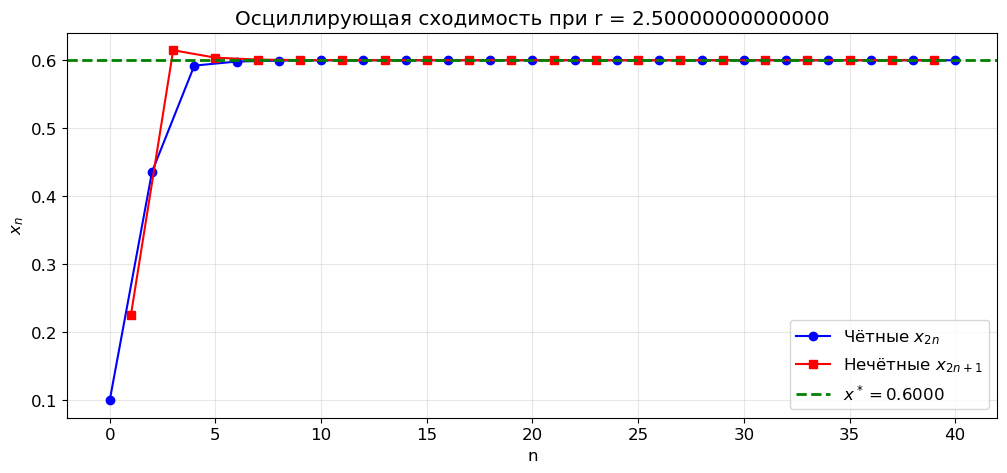

In [53]:
print("\nПри r ∈ (2, 3) производная f'(x*) = 2 - r ∈ (-1, 0)")
print("Чётные и нечётные члены сходятся к x* с разных сторон.")

# Демонстрация
r = 2.5
x0 = 0.1
x_star = 1 - 1/r

x_seq = [x0]
for _ in range(40):
    x_seq.append(r * x_seq[-1] * (1 - x_seq[-1]))

x_even = x_seq[0::2]  # x_0, x_2, x_4, ...
x_odd = x_seq[1::2]   # x_1, x_3, x_5, ...

print(f"\nПри r = {r}:")
print(f"x* = 1 - 1/r = {x_star:.6f}")
print(f"f'(x*) = 2 - r = {2 - r}")
print(f"\nЧётные члены (последние 5): {[f'{x:.6f}' for x in x_even[-5:]]}")
print(f"Нечётные члены (последние 5): {[f'{x:.6f}' for x in x_odd[-5:]]}")

print("\nВывод: ОБА подпоследовательности сходятся к ОДНОЙ точке x*!")
print("Это НЕ 2-цикл, а осциллирующая сходимость.")
print("Настоящий 2-цикл появляется только при r > 3.")

fig, ax = plt.subplots(figsize=(12, 5))
n = np.arange(len(x_seq))
ax.plot(n[::2], x_even, 'bo-', label='Чётные $x_{2n}$', markersize=6)
ax.plot(n[1::2], x_odd, 'rs-', label='Нечётные $x_{2n+1}$', markersize=6)
ax.axhline(y=x_star, color='g', linestyle='--', linewidth=2, label=f'$x^* = {x_star:.4f}$')
ax.set_xlabel('n')
ax.set_ylabel('$x_n$')
ax.set_title(f'Осциллирующая сходимость при r = {r}')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()



1. Находим неподвижные точки:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Отсюда:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


2. Условия существования неподвижных точек:
 x_1* = 0: существует ∀r
 x_2* = 1 - 1/r: существует только при r ≥ 1
 При 0 ≤ r < 1: x_2* < 0 (не входит в [0,1])
 При r = 1: x_1* = x_2* = 0 (кратная точка)
 При r > 1: две различные неподвижные точки

3. Ответы на вопросы задания:
а) Все неподвижные точки: x* = 0 и x* = 1 - 1/r (при r ≥ 1)
б) Одна неподвижная точка: при r ∈ [0, 1]
Две неподвижные точки: при r > 1
в) Максимальное количество неподвижных точек: 2. Почему? Уравнение f(x) = x является квадратным, значит может иметь не более 2 различных решений на R


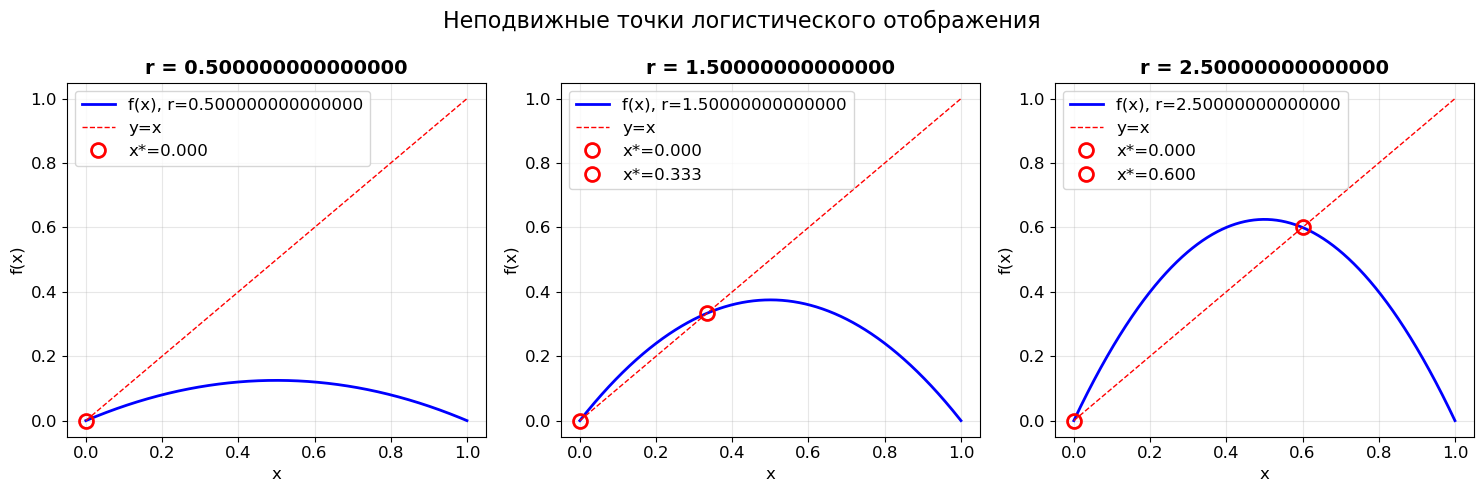


Докажем, что при x₀ ∈ (0, 1) и r ∈ (0, 1] последовательность монотонно убывает.

1. Доказательство монотонного убывания:


<IPython.core.display.Math object>


Рассмотрим разность:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


При xₙ ∈ (0, 1) и r ∈ (0, 1]:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


2. Существование предела:
Последовательность {xₙ} монотонно убывает
Ограничена снизу: 0 < xₙ (из Easy level)
По теореме Вейерштрасса: монотонная ограниченная последовательность имеет предел
Пусть lim xₙ = L, тогда из уравнения итерации:


<IPython.core.display.Math object>

Решение: L[r(1-L) - 1] = 0
При r ∈ (0, 1): L = 0 (единственное решение на (0,1))
При r = 1: L может быть 0, но это требует отдельной проверки

3. Графическая иллюстрация:


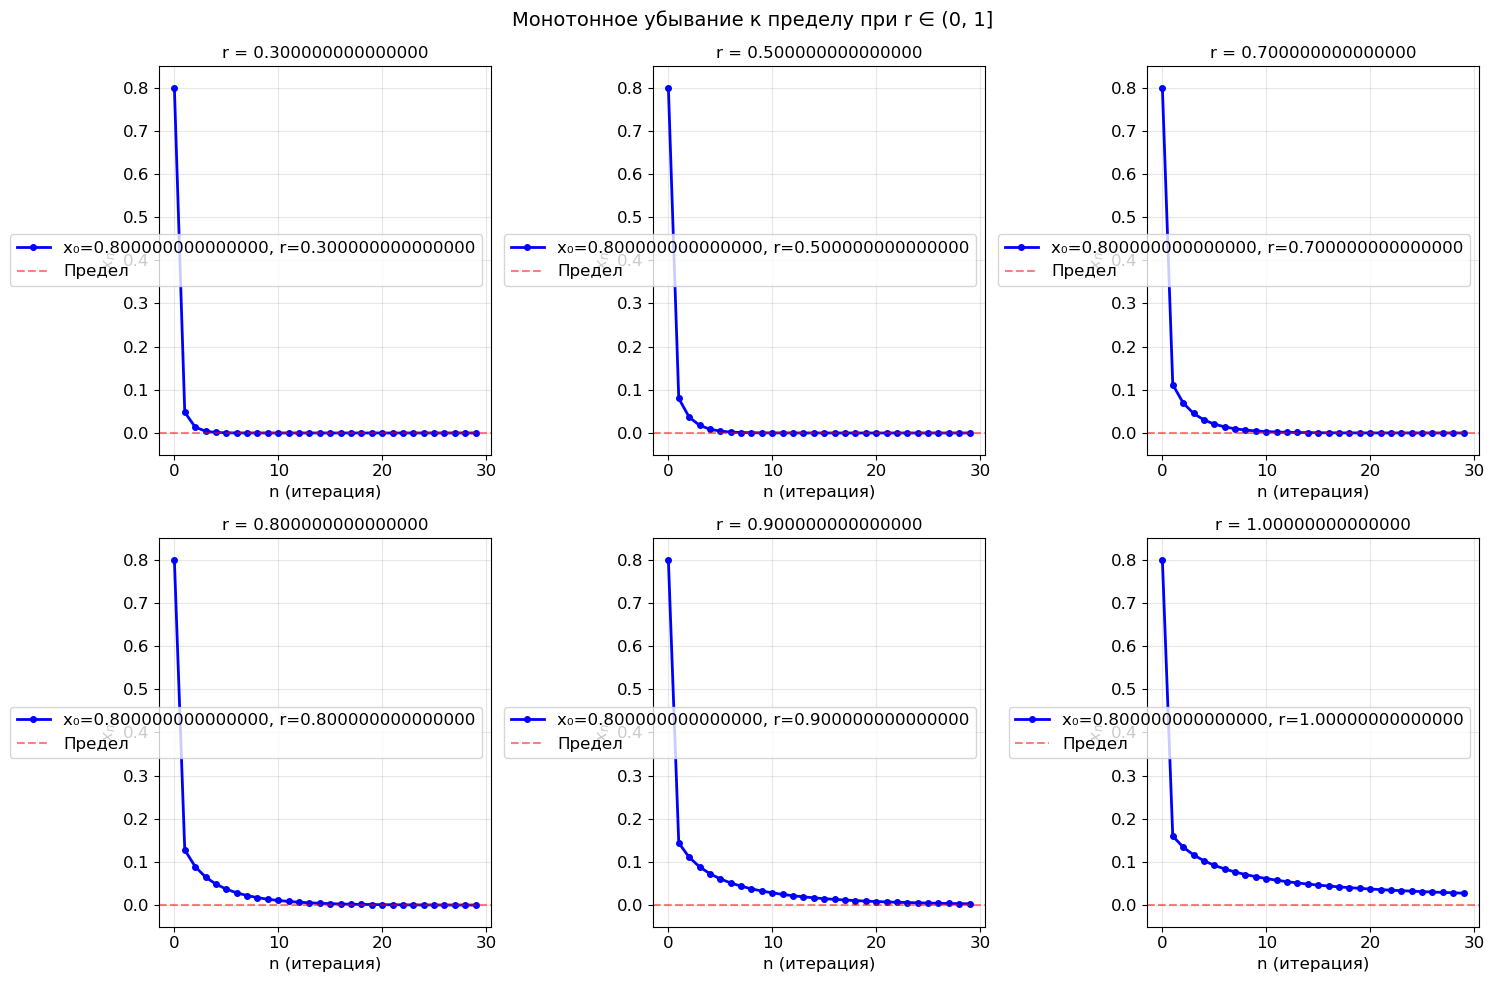


Условие: r ∈ (2, 3), x_{2n} > x^*, x_{2n+1} < x^*
где x* = 1 - 1/r - неподвижная точка

1. Анализ монотонности подпоследовательностей:
Рассмотрим {x_{2n}} (четные члены) и {x_{2n+1}} (нечетные члены)

2. Доказательство для r ∈ (2, 3):
а) При r > 2: f'(x*) = 2 - r < 0


<IPython.core.display.Math object>

б) Производная отрицательна ⇒ отображение 'переворачивает'
в) Это приводит к осцилляциям вокруг x*
г) Четные и нечетные подпоследовательности монотонны

3. Проверим графически:


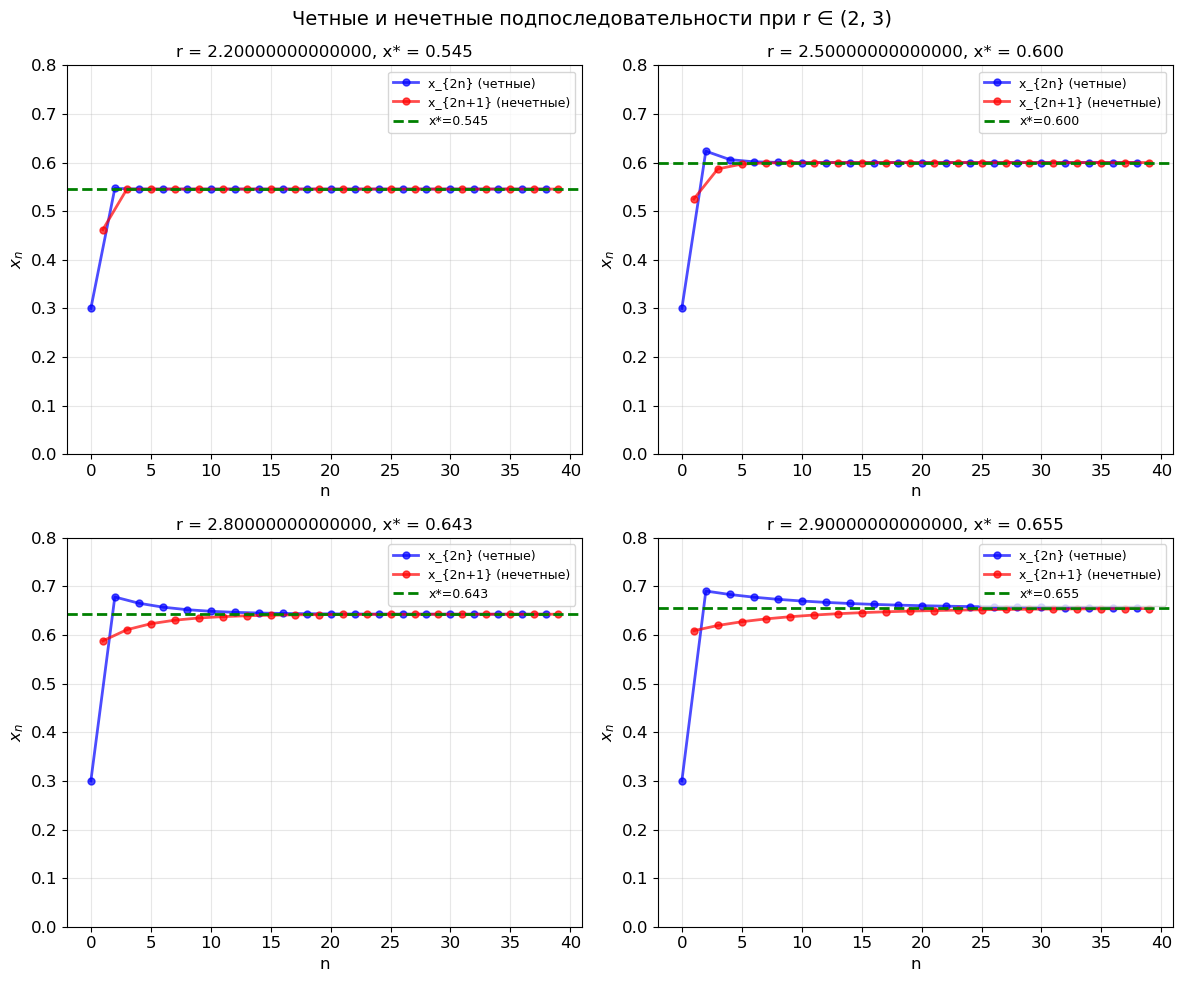


4. Наблюдения:
Четные члены {x_{2n}} монотонно убывают к x*
Нечетные члены {x_{2n+1}} монотонно возрастают к x*
Обе подпоследовательности сходятся к неподвижной точке
Это демонстрирует осциллирующую сходимость


In [54]:
# Аналитическое решение: f(x) = x
# r*x*(1-x) = x
# x(r*(1-x) - 1) = 0

print("\n1. Находим неподвижные точки:")
display(Math('f(x^*) = x^* \\quad \\Rightarrow \\quad r x^* (1 - x^*) = x^*'))
display(Math('\\Rightarrow x^*[r(1 - x^*) - 1] = 0'))

print("\nОтсюда:")
display(Math('x_1^* = 0'))
display(Math('r(1 - x^*) - 1 = 0 \\quad \\Rightarrow \\quad 1 - x^* = \\frac{1}{r}'))
display(Math('\\Rightarrow x_2^* = 1 - \\frac{1}{r}'))

print("\n2. Условия существования неподвижных точек:")
print(" x_1* = 0: существует ∀r")
print(" x_2* = 1 - 1/r: существует только при r ≥ 1")
print(" При 0 ≤ r < 1: x_2* < 0 (не входит в [0,1])")
print(" При r = 1: x_1* = x_2* = 0 (кратная точка)")
print(" При r > 1: две различные неподвижные точки")

print("\n3. Ответы на вопросы задания:")
print("а) Все неподвижные точки: x* = 0 и x* = 1 - 1/r (при r ≥ 1)")
print(f"б) Одна неподвижная точка: при r ∈ [0, 1]")
print(f"Две неподвижные точки: при r > 1")
print(f"в) Максимальное количество неподвижных точек: 2. Почему? Уравнение f(x) = x является квадратным, значит может иметь не более 2 различных решений на R")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

r_values = [0.5, 1.5, 2.5]
x = np.linspace(0, 1, 1000)

for i, r in enumerate(r_values):
    ax = axes[i]
    y = logistic(x, r)
    ax.plot(x, y, 'b-', linewidth=2, label=f'f(x), r={r}')
    ax.plot(x, x, 'r--', linewidth=1, label='y=x')
    
    fixed_points = [0]
    if r >= 1:
        fixed_points.append(1 - 1/r)
    for fp in fixed_points:
        if 0 <= fp <= 1:
            ax.plot(fp, fp, 'ro', markersize=10, markeredgewidth=2,
                   markerfacecolor='none', label=f'x*={fp:.3f}')
    
    ax.set_title(f'r = {r}', fontsize=14, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

plt.suptitle('Неподвижные точки логистического отображения', fontsize=16)
plt.tight_layout()
plt.show()

print("\nДокажем, что при x₀ ∈ (0, 1) и r ∈ (0, 1] последовательность монотонно убывает.")

print("\n1. Доказательство монотонного убывания:")
display(Math('\\text{Покажем, что } x_{n+1} < x_n \\quad \\forall n'))

print("\nРассмотрим разность:")
display(Math('x_{n+1} - x_n = r x_n (1 - x_n) - x_n'))
display(Math('= x_n [r(1 - x_n) - 1]'))

print("\nПри xₙ ∈ (0, 1) и r ∈ (0, 1]:")
display(Math('0 < x_n < 1 \\quad \\Rightarrow \\quad 0 < 1 - x_n < 1'))
display(Math('0 < r \\leq 1 \\quad \\Rightarrow \\quad 0 < r(1 - x_n) < 1'))
display(Math('\\Rightarrow r(1 - x_n) - 1 < 0'))
display(Math('\\Rightarrow x_n[r(1 - x_n) - 1] < 0'))
display(Math('\\Rightarrow x_{n+1} - x_n < 0 \\quad \\Rightarrow \\quad x_{n+1} < x_n'))

print("\n2. Существование предела:")
print("Последовательность {xₙ} монотонно убывает")
print("Ограничена снизу: 0 < xₙ (из Easy level)")
print("По теореме Вейерштрасса: монотонная ограниченная последовательность имеет предел")
print("Пусть lim xₙ = L, тогда из уравнения итерации:")

display(Math('L = \\lim_{n\\to\\infty} x_{n+1} = \\lim_{n\\to\\infty} r x_n (1 - x_n) = r L (1 - L)'))

print("Решение: L[r(1-L) - 1] = 0")
print("При r ∈ (0, 1): L = 0 (единственное решение на (0,1))")
print("При r = 1: L может быть 0, но это требует отдельной проверки")


print("\n3. Графическая иллюстрация:")
def iterate_logistic(x0, r, n_iter=50):
    """Генерирует последовательность логистического отображения"""
    x = np.zeros(n_iter)
    x[0] = x0
    for i in range(1, n_iter):
        x[i] = r * x[i-1] * (1 - x[i-1])
    return x

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

r_vals = [0.3, 0.5, 0.7, 0.8, 0.9, 1.0]
x0 = 0.8  # Начальное значение

for i, r in enumerate(r_vals):
    ax = axes[i]
    n = 30
    x_seq = iterate_logistic(x0, r, n)
    
    ax.plot(range(n), x_seq, 'bo-', linewidth=2, markersize=4, 
            label=f'x₀={x0}, r={r}')
    ax.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Предел')
    
    ax.set_title(f'r = {r}', fontsize=12)
    ax.set_xlabel('n (итерация)')
    ax.set_ylabel('$x_n$')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_ylim(-0.05, 0.85)

plt.suptitle('Монотонное убывание к пределу при r ∈ (0, 1]', fontsize=14)
plt.tight_layout()
plt.show()

print("\nУсловие: r ∈ (2, 3), x_{2n} > x^*, x_{2n+1} < x^*")
print("где x* = 1 - 1/r - неподвижная точка")

print("\n1. Анализ монотонности подпоследовательностей:")
print("Рассмотрим {x_{2n}} (четные члены) и {x_{2n+1}} (нечетные члены)")

print("\n2. Доказательство для r ∈ (2, 3):")
print("а) При r > 2: f'(x*) = 2 - r < 0")
display(Math('f\'(x^*) = r(1 - 2x^*) = 2 - r'))
print("б) Производная отрицательна ⇒ отображение 'переворачивает'")
print("в) Это приводит к осцилляциям вокруг x*")
print("г) Четные и нечетные подпоследовательности монотонны")

print("\n3. Проверим графически:")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

r_vals_osc = [2.2, 2.5, 2.8, 2.9]
x0 = 0.3

for i, r in enumerate(r_vals_osc):
    ax = axes[i]
    n = 40
    x_seq = iterate_logistic(x0, r, n)
    
    x_star = 1 - 1/r        # Неподвижная точка
    even_n = np.arange(0, n, 2)     # Разделяем на четные и нечетные
    odd_n = np.arange(1, n, 2)
    
    ax.plot(even_n, x_seq[even_n], 'bo-', linewidth=2, markersize=5, 
            label='x_{2n} (четные)', alpha=0.7)
    ax.plot(odd_n, x_seq[odd_n], 'ro-', linewidth=2, markersize=5,
            label='x_{2n+1} (нечетные)', alpha=0.7)
    ax.axhline(y=x_star, color='g', linestyle='--', linewidth=2,
              label=f'x*={x_star:.3f}')
    
    ax.set_title(f'r = {r}, x* = {x_star:.3f}', fontsize=12)
    ax.set_xlabel('n')
    ax.set_ylabel('$x_n$')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_ylim(0, 0.8)

plt.suptitle('Четные и нечетные подпоследовательности при r ∈ (2, 3)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n4. Наблюдения:")
print("Четные члены {x_{2n}} монотонно убывают к x*")
print("Нечетные члены {x_{2n+1}} монотонно возрастают к x*")
print("Обе подпоследовательности сходятся к неподвижной точке")
print("Это демонстрирует осциллирующую сходимость")


1. Аналитический поиск неподвижной точки:

Уравнение для неподвижных точек:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Преобразуем:
r x \left(1 - x\right) \left(3 - x\right) = x

Решения: [0, 2 - sqrt(r*(r + 1))/r, 2 + sqrt(r*(r + 1))/r]

2. Неподвижные точки:
а) x_1* = 0 (тривиальная)
б) Решения квадратного уравнения: r*(1-x)*(3-x) = 1

2) Решения уравнения r·(1-x)·(3-x) = 1
   Уравнение: r \left(1 - x\right) \left(3 - x\right) = 1
   Решения: [2 - sqrt(r**2 + r)/r, 2 + sqrt(r**2 + r)/r]
   x_2* = 2 - √(r(r+1))/r
   x_3* = 2 + √(r(r+1))/r

3. Условия существования неподвижных точек на [0,1]:
x=0 всегда существует
Квадратное уравнение может дать 0, 1 или 2 решения
Зависит от дискриминанта и значения r

4. Диапазон r для монотонной сходимости к нулю:

Для сходимости к x*=0 нужно:
x=0 должна быть устойчивой неподвижной точкой
|g'(0)| < 1

Производная: g'(x) = r \left(3 x^{2} - 8 x + 3\right)
g'(0) = 3 r = 3r

Условие устойчивости в нуле:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Диапазон для монотонной сходимости к нулю: r ∈ [0, 1/3)

5. Графики зависимости x_n от n для разных r:


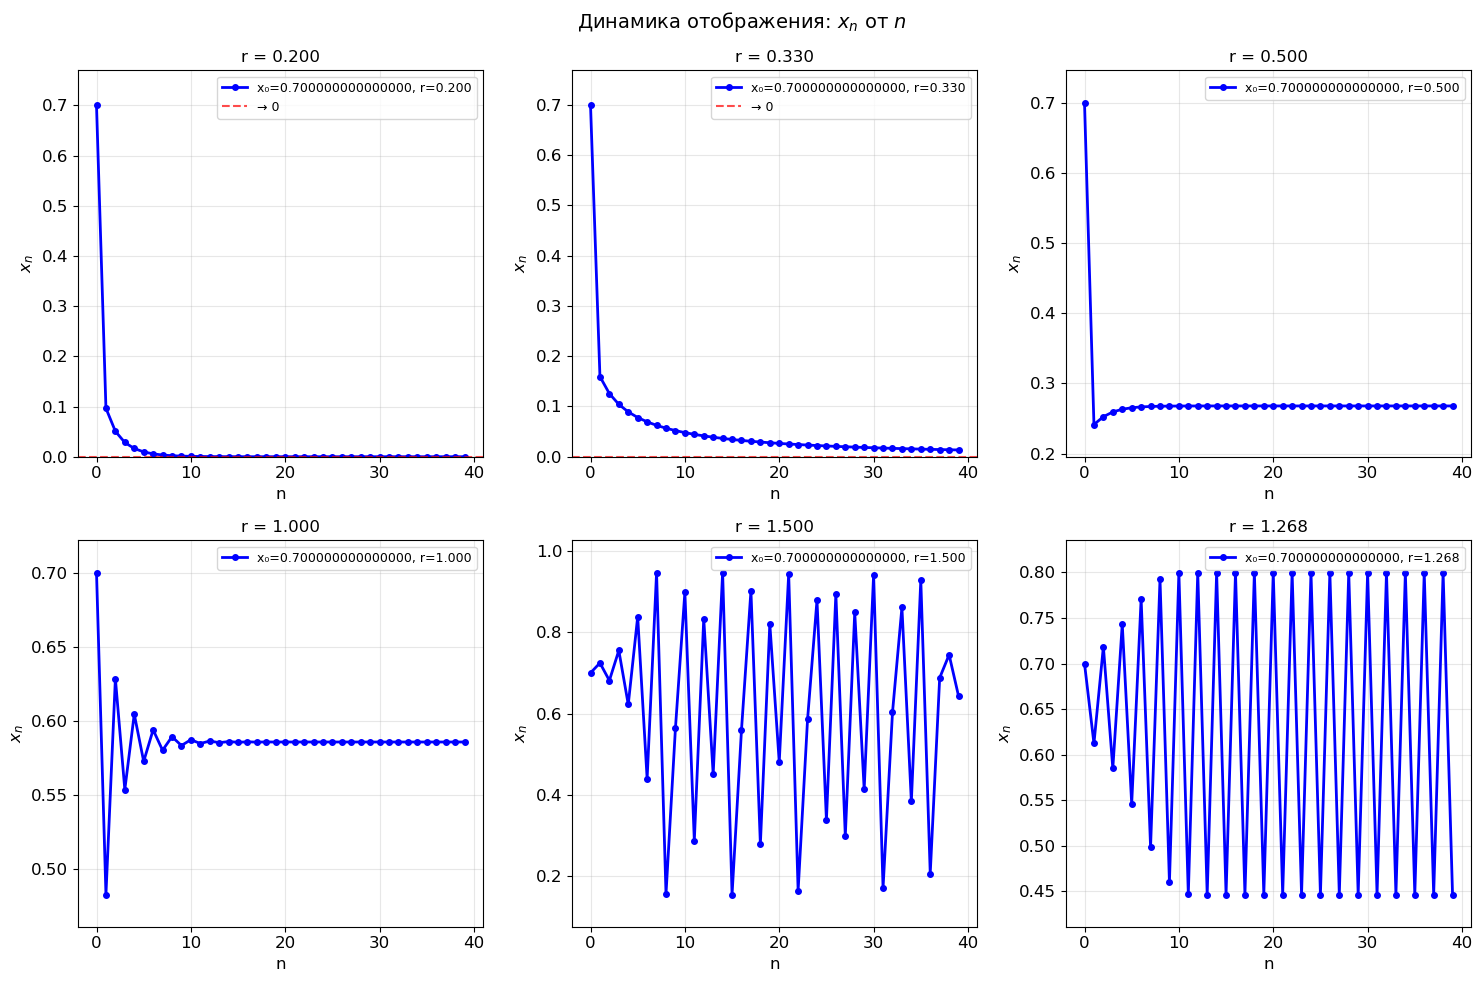

1. Неподвижные точки: x*=0 и x*=1-1/r (при r≥1)
2. При r ∈ (0,1]: монотонное убывание к 0
3. При r ∈ (2,3): осцилляции, четные/нечетные подпоследовательности
   монотонно сходятся к x*
1. Неподвижные точки: x=0 и решения r*(1-x)*(3-x)=1
2. Для сходимости к 0: r < 1/3
3. При малых r: монотонная сходимость к 0
4. При больших r: более сложное поведение


In [43]:
print("\n1. Аналитический поиск неподвижной точки:")

# Уравнение: g(x) = x
# r*x*(1-x)*(3-x) = x
# x[r*(1-x)*(3-x) - 1] = 0

x_sym, r_sym = sp.symbols('x r')
g_sym = r_sym * x_sym * (1 - x_sym) * (3 - x_sym)

print("\nУравнение для неподвижных точек:")
display(Math('g(x^*) = x^*'))
display(Math(f'\\Rightarrow {sp.latex(g_sym)} = x'))

print("\nПреобразуем:")
equation = sp.Eq(g_sym, x_sym)
print(sp.latex(equation))

# Решаем
solutions = sp.solve(equation, x_sym)
print(f"\nРешения: {solutions}")

print("\n2. Неподвижные точки:")
print("а) x_1* = 0 (тривиальная)")
print("б) Решения квадратного уравнения: r*(1-x)*(3-x) = 1")

quad_eq = sp.Eq(r_sym * (1 - x_sym) * (3 - x_sym), 1)
print("\n2) Решения уравнения r·(1-x)·(3-x) = 1") #как обычно юпитер видет везде сначала математику, а потом уже принты
print(f"   Уравнение: {sp.latex(quad_eq)}")
quad_solutions = sp.solve(quad_eq, x_sym)
print(f"   Решения: {quad_solutions}")
print("   x_2* = 2 - √(r(r+1))/r")
print("   x_3* = 2 + √(r(r+1))/r")

print("\n3. Условия существования неподвижных точек на [0,1]:")
print("x=0 всегда существует")
print("Квадратное уравнение может дать 0, 1 или 2 решения")
print("Зависит от дискриминанта и значения r")

print("\n4. Диапазон r для монотонной сходимости к нулю:")

print("\nДля сходимости к x*=0 нужно:")
print("x=0 должна быть устойчивой неподвижной точкой")
print("|g'(0)| < 1")

g_prime = sp.diff(g_sym, x_sym)
g_prime_0 = g_prime.subs(x_sym, 0)
print(f"\nПроизводная: g'(x) = {sp.latex(g_prime.simplify())}")
print(f"g'(0) = {sp.latex(g_prime_0)} = 3r")

print("\nУсловие устойчивости в нуле:")
display(Math('|g\'(0)| < 1 \\quad \\Rightarrow \\quad |3r| < 1'))
display(Math('\\Rightarrow r < \\frac{1}{3}'))

print(f"\nДиапазон для монотонной сходимости к нулю: r ∈ [0, 1/3)")


def iterate_g(x0, r, n_iter=50):        # Графики x_n от n для разных r
    """Итерации для функции"""
    x = np.zeros(n_iter)
    x[0] = x0
    for i in range(1, n_iter):
        x[i] = g_variant(x[i-1], r)
    return x

print("\n5. Графики зависимости x_n от n для разных r:")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

test_r_values = [0.2, 0.33, 0.5, 1.0, 1.5, r_max*0.8]
x0 = 0.7

for i, r in enumerate(test_r_values):
    ax = axes[i]
    n = 40
    x_seq = iterate_g(x0, r, n)
    
    ax.plot(range(n), x_seq, 'bo-', linewidth=2, markersize=4, 
            label=f'x₀={x0}, r={r:.3f}')
    
    if r < 1/3:
        ax.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='→ 0')
    
    ax.set_title(f'r = {r:.3f}', fontsize=12)
    ax.set_xlabel('n')
    ax.set_ylabel('$x_n$')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    
    y_min, y_max = np.min(x_seq), np.max(x_seq)    # Автоматические пределы по y
    margin = (y_max - y_min) * 0.1
    ax.set_ylim(max(0, y_min - margin), y_max + margin)

plt.suptitle('Динамика отображения: $x_n$ от $n$', fontsize=14)
plt.tight_layout()
plt.show()
print("1. Неподвижные точки: x*=0 и x*=1-1/r (при r≥1)")
print("2. При r ∈ (0,1]: монотонное убывание к 0")
print("3. При r ∈ (2,3): осцилляции, четные/нечетные подпоследовательности")
print("   монотонно сходятся к x*")

print("1. Неподвижные точки: x=0 и решения r*(1-x)*(3-x)=1")
print("2. Для сходимости к 0: r < 1/3")
print("3. При малых r: монотонная сходимость к 0")
print("4. При больших r: более сложное поведение")